# Section 3

In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

## numpy

In [2]:
import numpy as np

foo = np.array([20, 3, 0, -6])
foo

array([20,  3,  0, -6])

In [9]:
foo ** 2

array([400,   9,   0,  36])

In [14]:
foo = 20

In [15]:
foo % 2 == 1

False

In [6]:
foo

array([20,  3,  0, -6])

In [3]:
bar = [20, 3, 0, -6]
bar

[20, 3, 0, -6]

In [10]:
bar + 5

TypeError: can only concatenate list (not "int") to list

`numpy` is fast:

In [24]:
%%timeit

long_array = np.arange(0, 100_000)
long_array ** 2

84.5 µs ± 4.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%%timeit

long_list = []
for i in range(0, 100_000):
    long_list.append(i ** 2)

36.8 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
print(f'numpy is {36.8 * 1000 / 84.5:.2f} times faster!')

numpy is 435.50 times faster!


## pandas

In [16]:
df = pd.read_csv('all-lprs.csv.gz')
df.columns = ['plate', 'time', 'location']
df

,plate,time,location
0,1275226,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
1,27529C,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
2,1158423,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
...,...,...,...
2742098,5X10319,12/19/2013 08:28:00 PM,"(37.804148, -122.284861)"
2742099,7D56240,12/19/2013 08:28:00 PM,"(37.804096, -122.284635)"
2742100,6JNM127,12/19/2013 08:28:00 PM,"(37.80397, -122.284046)"


In [22]:
df.loc[:, ['time', 'plate']]

,time,plate
0,01/19/2011 02:06:00 AM,1275226
1,01/19/2011 02:06:00 AM,27529C
2,01/19/2011 02:06:00 AM,1158423
...,...,...
2742098,12/19/2013 08:28:00 PM,5X10319
2742099,12/19/2013 08:28:00 PM,7D56240
2742100,12/19/2013 08:28:00 PM,6JNM127


Let's look at previous Oakland Mayor Jean Quan's car. Her license plate is 6FCH845. (How did I learn that? Turns out she was in the news for getting $1000 of parking tickets, and the news article included a picture of her car, with the license plate visible. You'd be amazed by what's out there on the Internet...)

In [23]:
df

,plate,time,location
0,1275226,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
1,27529C,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
2,1158423,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
...,...,...,...
2742098,5X10319,12/19/2013 08:28:00 PM,"(37.804148, -122.284861)"
2742099,7D56240,12/19/2013 08:28:00 PM,"(37.804096, -122.284635)"
2742100,6JNM127,12/19/2013 08:28:00 PM,"(37.80397, -122.284046)"


In [29]:
df.loc[[True, False, True, True, False], :]

,plate,time,location
0,1275226,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
2,1158423,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"
3,1273718,01/19/2011 02:06:00 AM,"(37.798304999999999, -122.27574799999999)"


In [32]:
df.loc[df.loc[:, 'plate'] == '6FCH845', :]

,plate,time,location
1301320,6FCH845,11/01/2012 09:04:00 AM,"(37.79871, -122.276221)"
1369630,6FCH845,10/24/2012 11:15:00 AM,"(37.799695, -122.274868)"
1369854,6FCH845,10/24/2012 11:01:00 AM,"(37.799693, -122.274806)"
1369967,6FCH845,10/24/2012 10:20:00 AM,"(37.799735, -122.274893)"
2242582,6FCH845,05/08/2014 07:30:00 PM,"(37.797558, -122.26935)"
2648779,6FCH845,12/31/2013 10:09:00 AM,"(37.807556, -122.278485)"


In [45]:
df.loc[:, 'plate']
# df['plate']

0          1275226
1           27529C
2          1158423
            ...   
2742098    5X10319
2742099    7D56240
2742100    6JNM127
Name: plate, Length: 2742101, dtype: object

In [19]:
df['plate'] == '6FCH845'

0          False
1          False
2          False
           ...  
2742098    False
2742099    False
2742100    False
Name: plate, Length: 2742101, dtype: bool

In [49]:
df.loc[df['plate'] == '6FCH845', ['plate', 'time']]

,plate,time
1301320,6FCH845,11/01/2012 09:04:00 AM
1369630,6FCH845,10/24/2012 11:15:00 AM
1369854,6FCH845,10/24/2012 11:01:00 AM
1369967,6FCH845,10/24/2012 10:20:00 AM
2242582,6FCH845,05/08/2014 07:30:00 PM
2648779,6FCH845,12/31/2013 10:09:00 AM


## Making plots

In [46]:
locations = (df['location']
 .str.strip('()')
 .str.split(', ', expand=True)
 .rename(columns={0: 'lat', 1: 'lon'})
 .assign(lat=lambda df: df['lat'].astype(float))
 .assign(lon=lambda df: df['lon'].astype(float))
)
locations

,lat,lon
0,37.8,-122.28
1,37.8,-122.28
2,37.8,-122.28
...,...,...
2742098,37.8,-122.28
2742099,37.8,-122.28
2742100,37.8,-122.28


In [47]:
df_clean = (
    df.assign(lat=locations['lat'], lon=locations['lon'])
    .drop(columns=['location'])
    .query('lon < -122.1 & lon > -122.3')
)
df_clean

,plate,time,lat,lon
0,1275226,01/19/2011 02:06:00 AM,37.8,-122.28
1,27529C,01/19/2011 02:06:00 AM,37.8,-122.28
2,1158423,01/19/2011 02:06:00 AM,37.8,-122.28
...,...,...,...,...
2742098,5X10319,12/19/2013 08:28:00 PM,37.8,-122.28
2742099,7D56240,12/19/2013 08:28:00 PM,37.8,-122.28
2742100,6JNM127,12/19/2013 08:28:00 PM,37.8,-122.28


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a70593710>]],
      dtype=object)

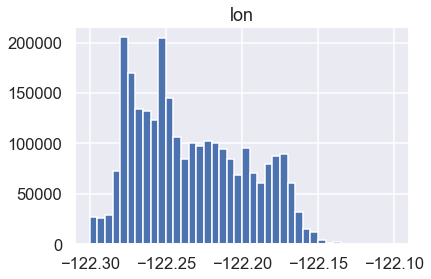

In [23]:
df_clean.hist('lon', bins=40)